## Sigmoid函数

In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def sigmoid(t):
    return 1 /(1+np.exp(-t))

x = np.linspace(-10, 10, 500)
y = sigmoid(x)

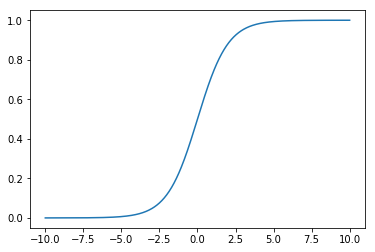

In [81]:
plt.plot(x, y)
plt.show()

## 实现逻辑回归

In [82]:
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import datasets

In [83]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [84]:
X = X[y<2, :2]  #这里只拿出0,1样本(因为LR解决2分类问题)，并且只取2个特征值
y = y[y<2]

In [85]:
X.shape, y.shape

((100, 2), (100,))

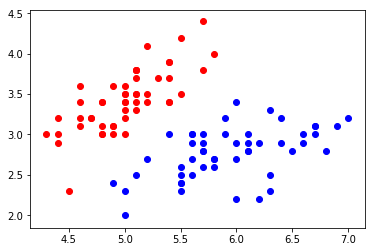

In [86]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')

### 使用自己封装的LR函数

In [87]:
from algorithm.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [88]:
from algorithm.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [89]:
log_reg.score(X_test, y_test)

1.0

In [90]:
log_reg.predict_proba(X_test), y_test

(array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
        0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
        0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
        0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334]),
 array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]))

In [91]:
log_reg.predict(X_test), y_test

(array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]),
 array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]))

In [92]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [93]:
log_reg.intercept_

-0.6937719272911228

## 决策边界

In [94]:
def x2(x1):
    return (-log_reg.coef_[0]*x1 - log_reg.intercept_) / log_reg.coef_[1]

In [95]:
x1_plot = np.linspace(4, 7.5, 1000)
x2_plot = x2(x1_plot)

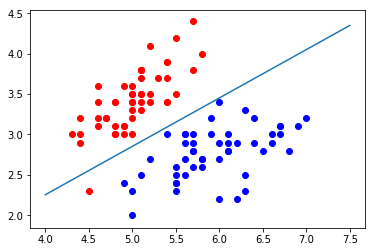

In [96]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.plot(x1_plot, x2_plot)

### 填充法绘制不规则的决策边界 
     即将坐标平面用网格分割，对每个‘像素点’进行预测后填色

In [105]:
def plot_decision_boundary(model, axis): #该模块可以画出不规则的边界，当做工具用即可
    
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


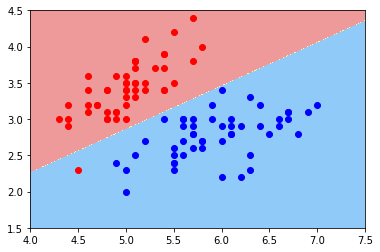

In [104]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')

### kNN的决策边界

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
knn_clf.score(X_test, y_test)

1.0

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


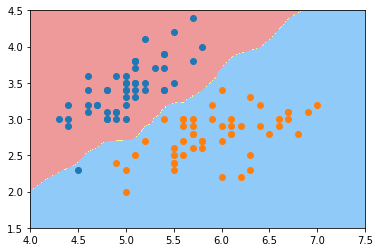

In [23]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [24]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target) #这里将所有样本进行训练，为了可视化，只取2个特征。target的取值为3

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


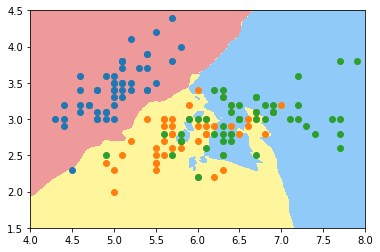

In [25]:
# 可以看到决策边界和不规则，产生了过拟合的现象，这个时候需要适当调整k值 (k越小模型越复杂)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


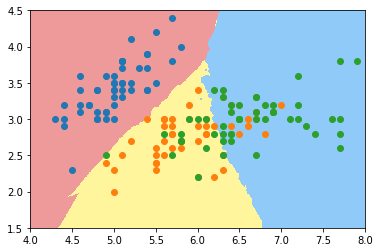

In [26]:
# 调整k值，防止过拟合

knn_clf_all2 = KNeighborsClassifier(50)
knn_clf_all2 .fit(iris.data[:, :2], iris.target)

plot_decision_boundary(knn_clf_all2, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0, 1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1, 1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2, 1])

## 逻辑回归中添加多项式特征
    解决非线性问题

In [27]:
import numpy as np
import matplotlib.pyplot as plt  

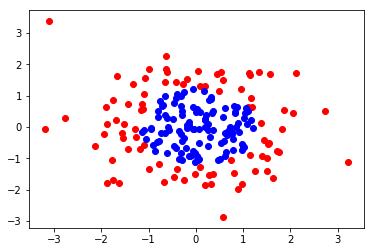

In [28]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200,2))
y = np.array(X[:, 0]**2 + X[:, 1]**2 < 1.5, dtype='int')

plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')

### 使用逻辑回归（不添加多项式特征，处理线性分类问题）

In [29]:
from algorithm.LogisticRegression import LogisticRegression

In [30]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [31]:
log_reg.score(X, y)

0.605

In [32]:
def plot_decision_boundary(model, axis): #该模块可以画出不规则的边界，当做工具用即可
    
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


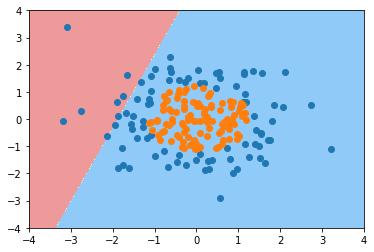

In [33]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

### 逻辑回归添加多项式特征（处理非线性分类问题）

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):              #采用管道将步骤进行封装
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),   #添加多项式项
        ('std_scaler', StandardScaler()),              #数据归一化
        ('logistic', LogisticRegression())             #训练逻辑回归模型
    ])

In [35]:
poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression())])

In [36]:
poly_log_reg.score(X, y)

0.95

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


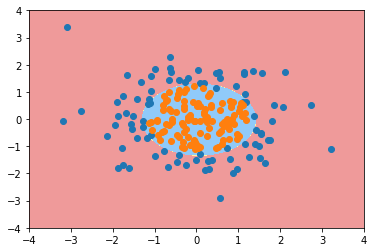

In [37]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [38]:
poly20_log_reg = PolynomialLogisticRegression(20)
poly20_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression())])

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


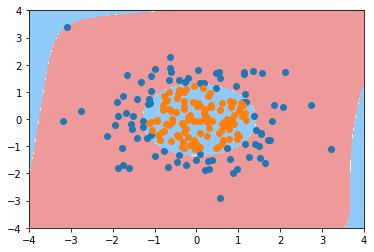

In [39]:
plot_decision_boundary(poly20_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## 逻辑回归中使用正则化
    scikit-learn中封装

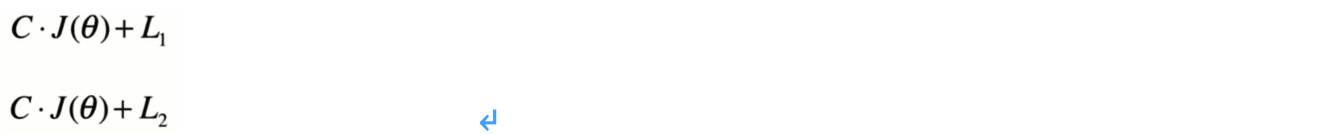

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
def plot_decision_boundary(model, axis): #该模块可以画出不规则的边界，当做工具用即可
    
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [42]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200,2))
y = np.array(X[:, 0]**2 + X[:, 1] < 1.5, dtype='int')

for _ in range(20):
    y[np.random.randint(200)] = 1     #强制将20个数变成1分类，也就是模拟引入了噪音

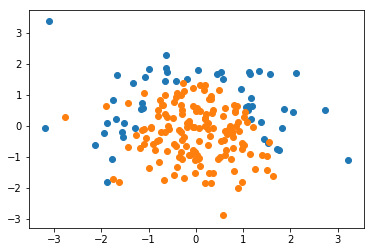

In [43]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [44]:
from algorithm.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

### 使用简单逻辑回归

In [45]:
# C:损失函数J(θ)系数， penalty：正则化项（默认使用L2）
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
log_reg.score(X_train, y_train), log_reg.score(X_test, y_test)

(0.8125, 0.875)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


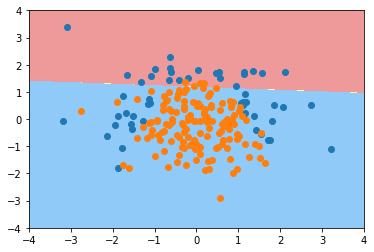

In [47]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

### 添加多项式项逻辑回归

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):              #采用管道将步骤进行封装
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),   #添加多项式项
        ('std_scaler', StandardScaler()),              #数据归一化
        ('logistic', LogisticRegression())             #训练逻辑回归模型
    ])

In [49]:
poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(X_train, y_train)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [50]:
poly_log_reg.score(X_train, y_train), poly_log_reg.score(X_test, y_test)

(0.9125, 0.925)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


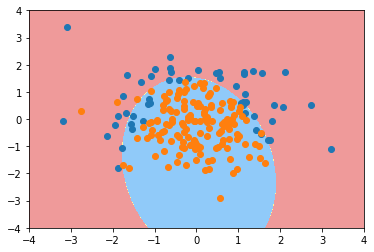

In [51]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [52]:
poly20_log_reg = PolynomialLogisticRegression(20)
poly20_log_reg.fit(X_train, y_train)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [53]:
poly20_log_reg.score(X_train, y_train), poly20_log_reg.score(X_test, y_test)

(0.9375, 0.9)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


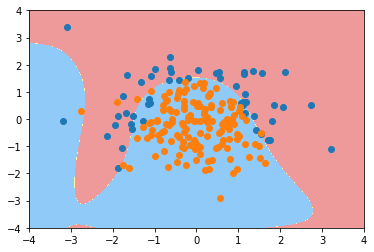

In [54]:
# degree过大，训练集拟合能力提高，测试集泛化能力降低，过拟合，需调整正则化参数
plot_decision_boundary(poly20_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

#### 调整正则化参数

In [55]:
def PolynomialLogisticRegression(degree, C, penalty='l2'):   #默认是l2
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('logistic', LogisticRegression(C=C, penalty=penalty))     
    ])

In [56]:
poly_log_reg3 = PolynomialLogisticRegression(20, C=0.1)  # C越小，正则化项起的作用越大
poly_log_reg3.fit(X_train, y_train)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [57]:
poly_log_reg3.score(X_train, y_train), poly_log_reg3.score(X_test, y_test)

(0.85, 0.9)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


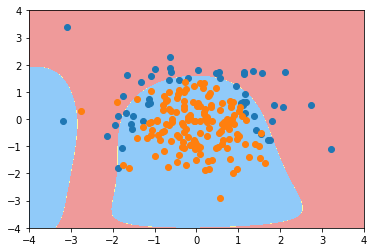

In [58]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [59]:
poly_log_reg4 = PolynomialLogisticRegression(20, C=0.1, penalty='l1')  # 使用L1正则化项
poly_log_reg4.fit(X_train, y_train)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [60]:
poly_log_reg4.score(X_train, y_train), poly_log_reg4.score(X_test, y_test)

(0.8375, 0.85)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


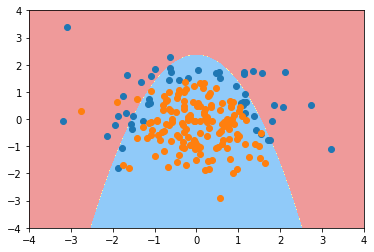

In [61]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

## 支持多分类

### OvR

In [62]:
def plot_decision_boundary(model, axis): #该模块可以画出不规则的边界，当做工具用即可
    
    x0,x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [63]:
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import datasets

In [64]:
iris = datasets.load_iris()
X = iris.data[:, :2]     #为了可视化需要，先用两个特征，后面将会使用全部的特征
y = iris.target

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [66]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)

/Users/aeternae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
log_reg.score(X_test, y_test)

0.6578947368421053

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


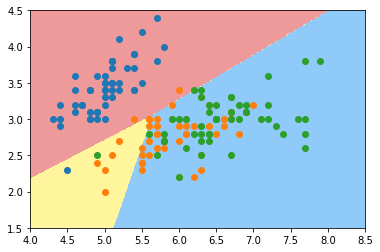

In [68]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

### OvO
     与OvR相比，算法复杂度高，但结果更加准确

In [69]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
log_reg2.score(X_test, y_test)

0.7894736842105263

/Users/aeternae/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


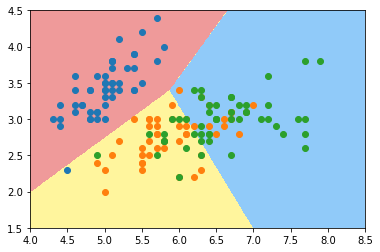

In [71]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

### 使用数据所有特征

In [72]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [73]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs')
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9736842105263158

In [74]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

1.0

### sciki-learn中封装了OvR 与 OvO

In [75]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)   # 传入参数为二分类器
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9736842105263158

In [76]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0